In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

决策树（Decision Tree）是一种有监督学习方法，从数据中找出决策规则，以树状结构表示这些规则。


# 决策树(Decision Tree)

In [2]:
fruit_dat = pd.DataFrame({
    'Width': [7.1, 7.9, 7.4, 8.2, 7.6, 7.8, 7, 7.1, 6.8, 6.6, 7.3, 7.2],
    'Height': [7.3, 7.5, 7, 7.3, 6.9, 8, 7.5, 7.9, 8, 7.7, 8.2, 7.9],
    'Fruit': np.repeat(['Apple', 'Pear'], 6)
    })
fruit_dat

Width  Height  Fruit
0     7.1     7.3  Apple
1     7.9     7.5  Apple
2     7.4     7.0  Apple
3     8.2     7.3  Apple
4     7.6     6.9  Apple
5     7.8     8.0  Apple
6     7.0     7.5   Pear
7     7.1     7.9   Pear
8     6.8     8.0   Pear
9     6.6     7.7   Pear
10    7.3     8.2   Pear
11    7.2     7.9   Pear

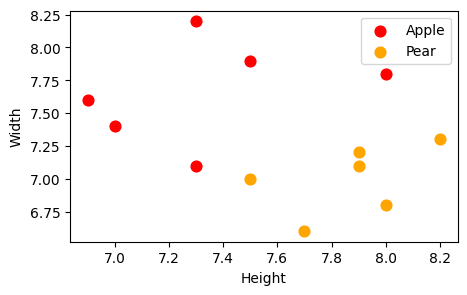

In [3]:
fruit_apples = fruit_dat[fruit_dat.Fruit == 'Apple']
fruit_pears  = fruit_dat[fruit_dat.Fruit == 'Pear']

plt.figure(figsize=(5, 3), dpi=100)
plt.scatter(fruit_apples.Height, fruit_apples.Width, s=60, c='red', label='Apple')
plt.scatter(fruit_pears.Height, fruit_pears.Width, s=60, c='orange', label='Pear')
plt.xlabel('Height')
plt.ylabel('Width')
plt.legend()

plt.show()

<table><tr style="background: white">
  <td width="48%"><img src="attachment:a59d1494-c671-4223-9e68-415c49f09f34.png" /></td>
  <td width="48%"><img src="attachment:f4099ee9-8cfa-4990-8d0a-18f31df8637d.png" /></td>
</tr></table>

In [4]:
fruit_dat[fruit_dat.Width > 7.35]

Width  Height  Fruit
1    7.9     7.5  Apple
2    7.4     7.0  Apple
3    8.2     7.3  Apple
4    7.6     6.9  Apple
5    7.8     8.0  Apple

In [5]:
fruit_dat[(fruit_dat.Width < 7.35) & (fruit_dat.Height < 7.4)]

Width  Height  Fruit
0    7.1     7.3  Apple

In [6]:
np.log

<ufunc 'log'>

## 构造决策树


如果评价拆分？
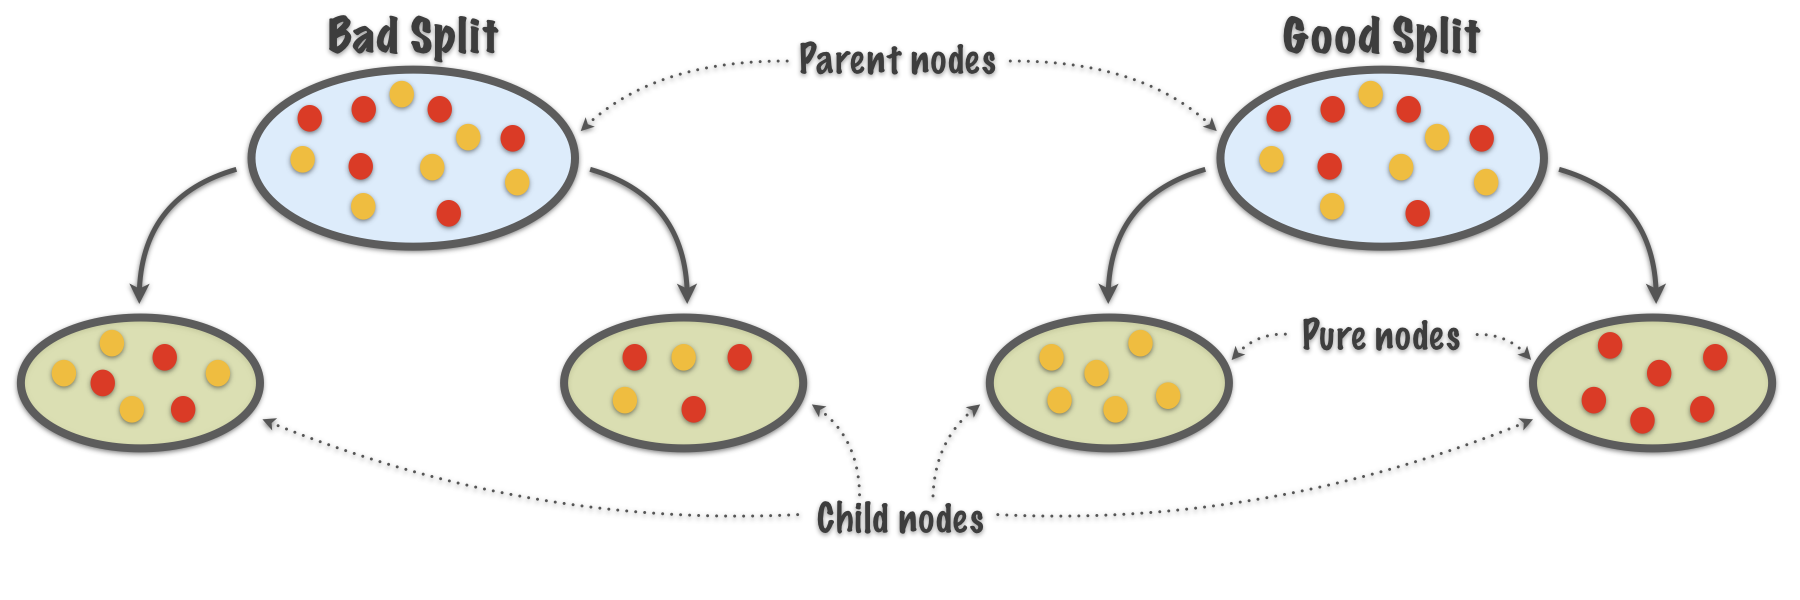

熵(Entropy)的定义
$$
H(X)=-\sum_{i=1}^{n} P\left(x_{i}\right) \log _{2} P\left(x_{i}\right)
$$



拆分树获得的信息增益$IG$,  
$$
\begin{array}{l}
{IG(X, F)=(\text{original entropy})-(\text{entropy after the split})} \\ 
{IG(X, F) = H(X) - \sum\limits_{i=1}^{n} \frac{\left|x_{i}\right|}{X} H\left(x_{i}\right)}
\end{array}
$$


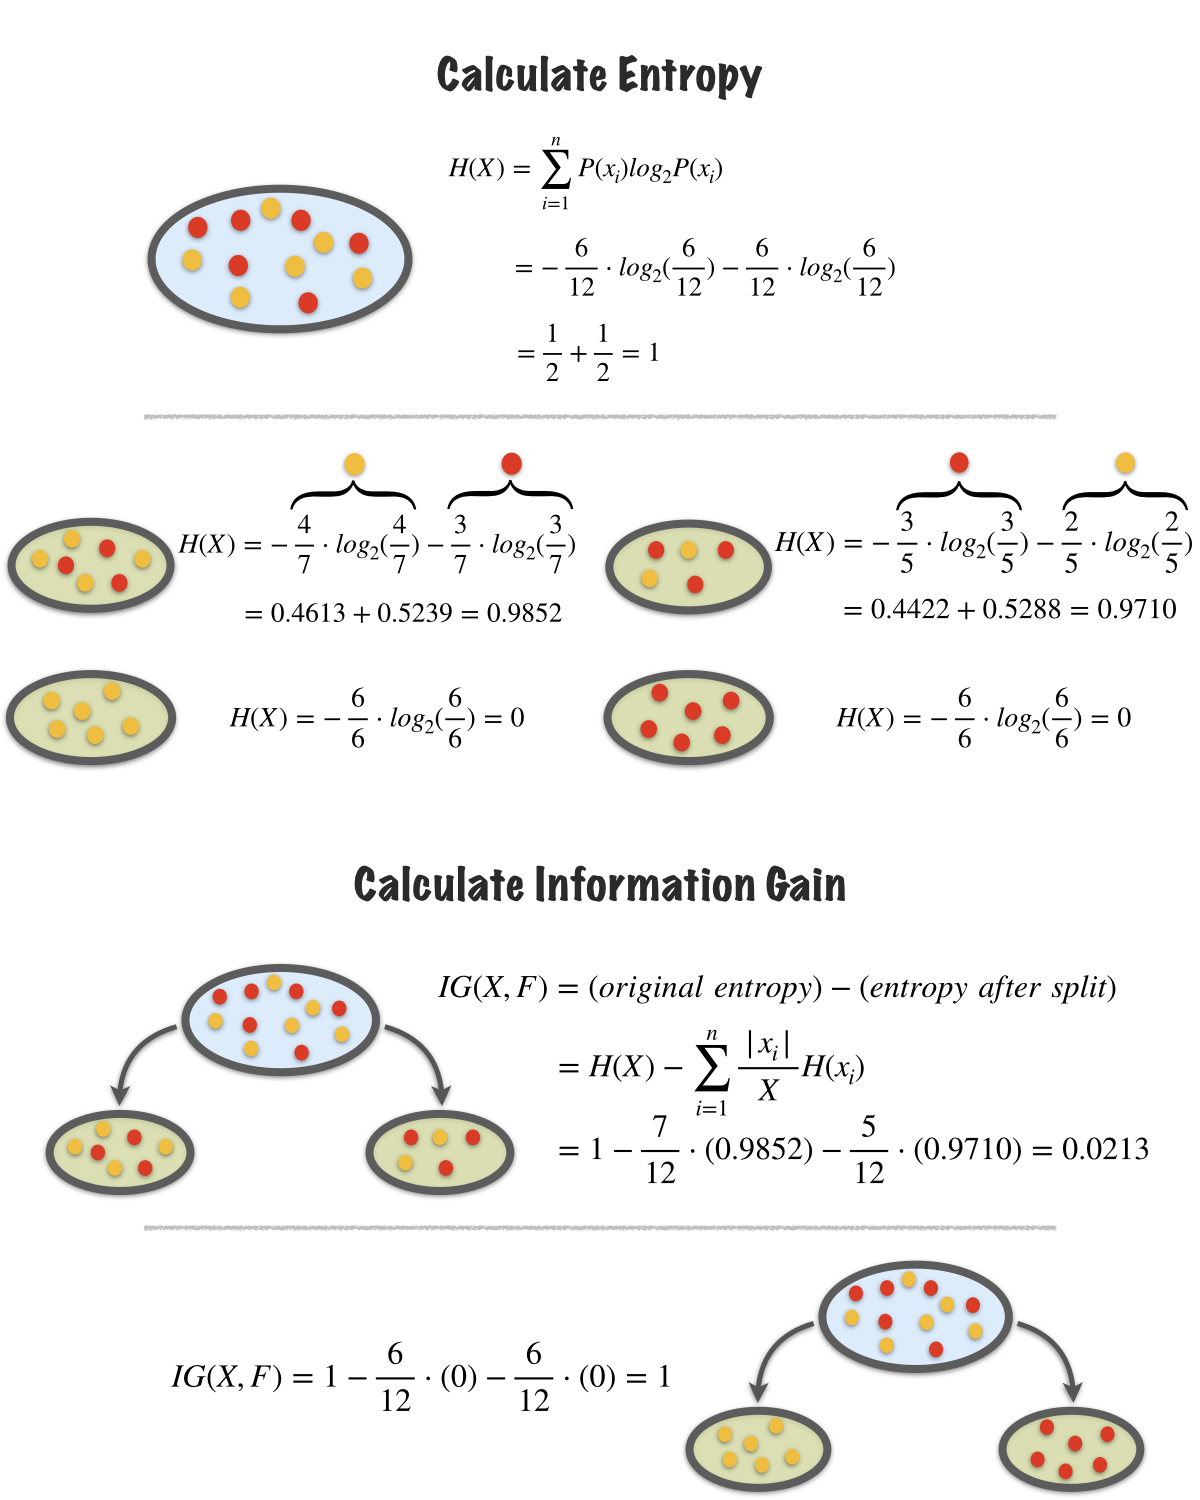

### 决策树生成算法

决策树模型的训练是一个递归过程，构建决策树的总体流程如下：
1. 开始：将所有训练样本放到根节点
2. 选择最优特征：从当前节点剩余的特征集合中选择一个最优的特征，作为划分节点的依据
3. 划分节点：根据选择的特征，将当前节点划分为多个子节点。每个子节点对应于该特征的一个测试结果
4. 递归：对每个子节点，重复步骤2~3，直到满足停止条件

常见的停止条件有：
1. 如果当前节点下的所有样本都属于同一个类别，则此时显然无需进行再次划分。可直接将当前节点作为该类别的叶子节点。
1. 当前节点下无剩余特征可用于继续划分，其包含下述两种场景。此时，可将当前节点作为叶子节点。
   其中，类别结果为当前节点的所有样本中样本数最多的类别：
    * 当前节点的所有样本下已经没有可以继续划分的剩余特征
    * 当前节点下所有样本的剩余特征取值都相同。换言之，此时剩余特征没有区分度
1. 当前节点下的样本为空集，显然此时无法继续划分。
  故将当前节点作为叶子节点，类别结果为父节点的所有样本中样本数最多的类别。
  此外，也可根据实际业务的偏好，指定为默认的某个类别。



### 模型的过度拟合
决策树，作为一种直观且强大的机器学习模型，因其清晰的决策逻辑而广受欢迎。然而，它也极易陷入一种被称为“过度拟合”（Overfitting）的陷阱。当决策树模型在训练数据上表现完美，但在新的、未见过的数据上表现不佳时，就发生了过度拟合。这种情况意味着模型学到了训练数据中的“噪声”，而非其潜在的、可泛化的规律。

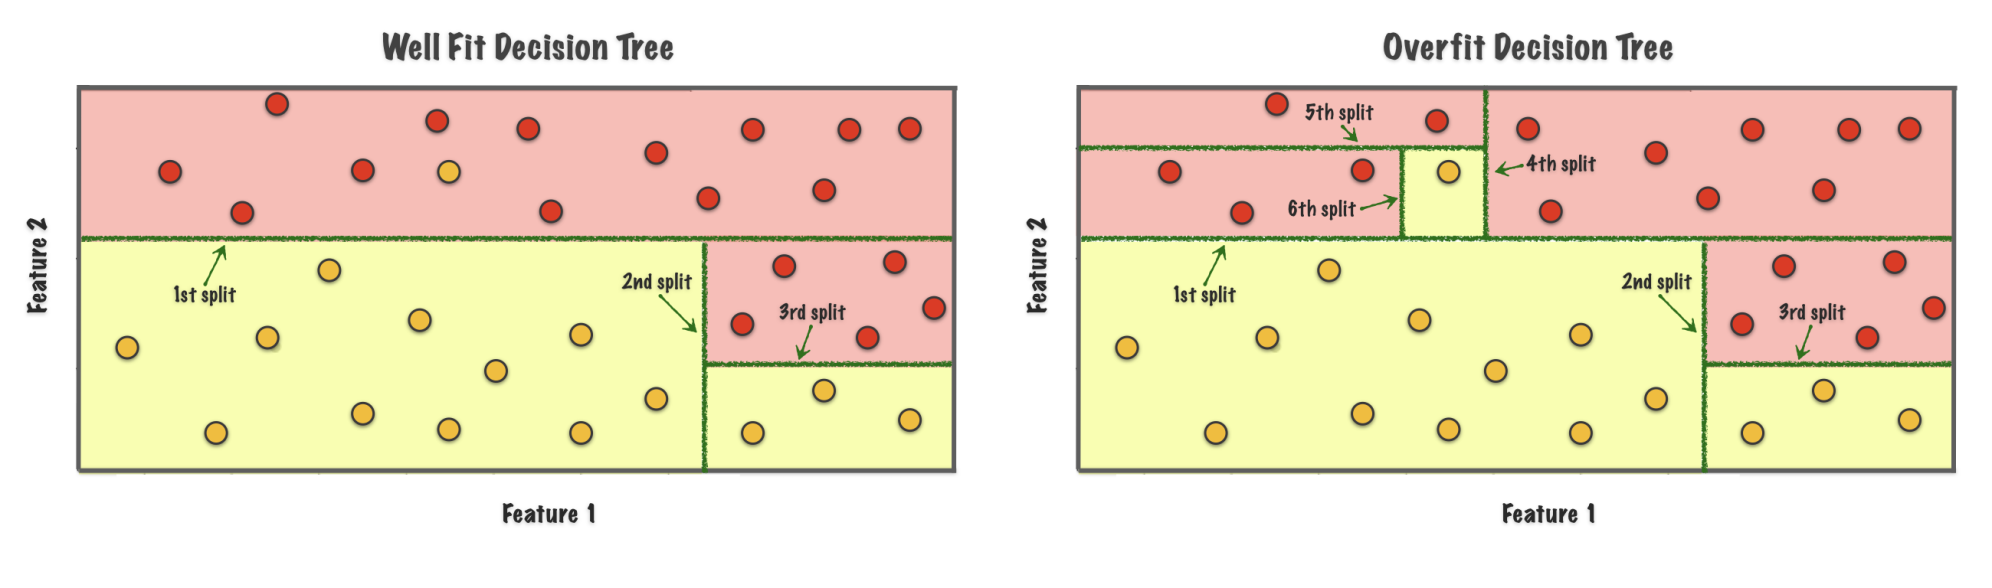

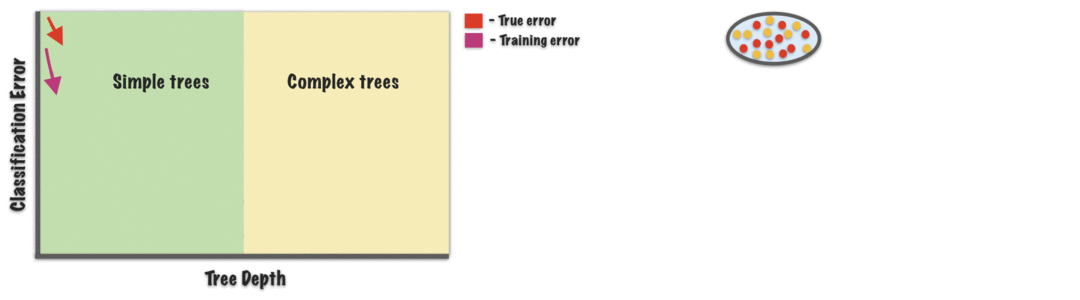

决策树的构建过程是其容易过度拟合的根本原因。其内在的递归分割特性，使其倾向于不断地划分数据，直到每个叶节点都“纯净”（即只包含单一类别的样本）为止。这导致了以下几个主要的过度拟合诱因：
* 数据中的噪声： 训练数据中不可避免地会存在一些错误标记或异常值。决策树算法会试图将这些噪声点也完美地分离开来，从而生成不必要的复杂分支。
* 特征过多或无关特征： 当数据集中包含大量特征，尤其是其中一些与目标变量无关时，决策树可能会错误地将这些无关特征作为划分依据，从而创建出无意义的规则。
* 训练样本不足： 如果训练数据集规模太小，或者不具有代表性，决策树很容易学到特定于这个小数据集的“怪癖”，而这些“怪癖”在更广泛的人群中并不适用。
* 不加限制的树生长： 如果不加以任何限制，决策树会持续生长，直到无法再进行划分为止。这自然会产生一个极其复杂的、为训练数据“量身定做”的模型。

### 剪枝(Pruning)


决策树的典型缺点是容易过拟合，为此需要引入剪枝。具体地，可分为预剪枝、后剪枝。

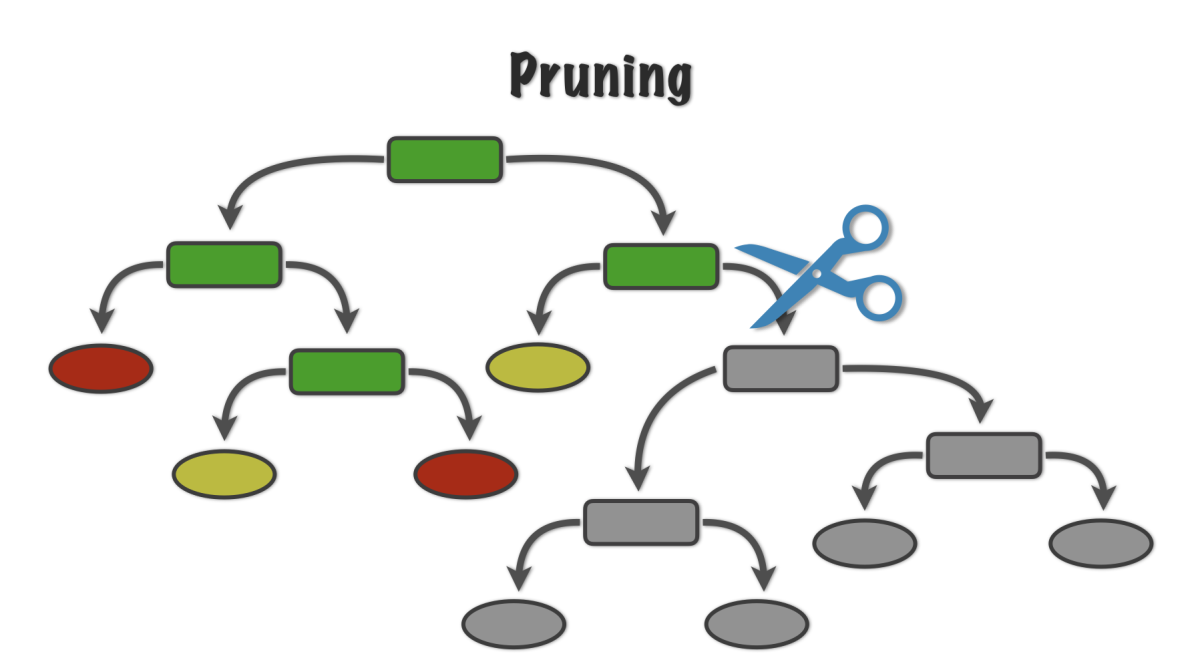

**预剪枝**：在树的构建过程中提前停止节点的分裂。防止树过度生长，避免过拟合。常见的策略有：
* 树的最大深度达到指定阈值
* 当前节点的样本数小于指定阈值
* 决策树为CART算法时，当前节点的基尼指数低于指定阈值。因为基尼指数越小，表示其包含的样本不纯度越低、纯度越高。如果节点下所有样本的纯度非常非常高，虽然基尼指数没有达到0，但也没有继续划分的必要，避免过拟合。

**后剪枝**：对已经生成好的决策树进行剪枝。通过某种方法将 某个非叶子节点及对应的子树 直接替换为 叶子节点。这样可实现对决策树泛化能力的提升。





### 纯度

决策树算法在选择最佳划分特征时，需要一个指标来衡量划分后的“**纯度**”（Purity）。信息熵（Information Entropy）和基尼不纯度（Gini Impurity）正是两种最常用的纯度衡量指标。

尽管信息熵在理论上更为纯粹，但**基尼不纯度**（Gini Impurity）的存在主要是出于计算效率和实践效果的考量。 它在大多数情况下能够达到与信息熵相似的效果，但计算速度更快。

$$
\mathrm{Gini}(D) = 1 − \sum_{k=1}^K p_k^2
$$


信息熵的计算包含对数运算，对数计算通常比简单的乘法和加法要慢。基尼不纯度的计算不涉及对数，只有平方和减法。对于计算机而言，这通常意味着更快的执行速度。在处理大规模数据集时，决策树需要评估成千上万次的可能划分，这种计算上的微小差异会被放大，从而显著影响模型的训练时间。

另外，信息熵和基尼不纯度的衡量目标是高度一致的：两者都在数据集的类别分布最混乱（例如，50%/50%的二分类问题）时达到最大值，在数据集只包含单一类别（纯净）时达到最小值0。这意味着，在绝大多数情况下，使用信息熵找到的最佳划分点和使用基尼不纯度找到的最佳划分点是完全相同的。

尽管在宏观上结果相似，但在某些特定情况下，两者之间也存在一些细微差别，这可能会影响最终生成的树的结构。信息熵倾向于产生更“平衡”的树。 对数函数的特性使得信息熵对于纯度的变化更为敏感。当一个节点中的数据类别分布稍微有些不均衡时，信息熵会给予一个比基尼不纯度更大的“惩罚”。这可能会促使算法在划分时更倾向于生成大小更均匀的子节点。基尼不纯度倾向于将大类分离出来。 基尼不纯度的计算方式使其更关注于找到能将数据集中最大的类别优先划分出去的特征。

### 决策树的缺点


* 决策树的鲁棒性(robustness)不是很好，训练集中一个较小变化就可能导致生成的树和结果推断有较大的变化。
* 决策树的搜索全局最优解是一个NP问题，实际应用时决策树的训练采用启发式搜索算法例如 贪心算法 来达到局部最优。这样的算法没办法得到最优的决策树。
* 决策树创建的过度复杂会导致无法很好的预测训练集之外的数据。


### 控制决策树的复杂性

Python类`DecisionTreeClassifier`提供了相当多的参数调整学习控制模型复杂性。

* **max_depth**  This determines the maximum depth of the tree. In our case, we use a depth of two to make our decision tree. The default value is set to none. This will often result in over-fitted decision trees. The depth parameter is one of the ways in which we can regularize the tree, or limit the way it grows to prevent over-fitting. 

* **min_samples_split** The minimum number of samples a node must contain in order to consider splitting. The default value is two. You can use this parameter to regularize your tree.

* **min_samples_leaf** The minimum number of samples needed to be considered a leaf node. The default value is set to one. Use this parameter to limit the growth of the tree.

* **max_features** The number of features to consider when looking for the best split. If this value is not set, the decision tree will consider all features available to make the best split.

In [8]:
from scipy import ndimage
def plot_tree_partition(X, y, tree, ax=None):
    if ax is None:
        ax = plt.gca()
        
    eps = X.std() / 2

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]

    Z = tree.predict(X_grid)
    Z = Z.reshape(X1.shape)
    
    faces = tree.apply(X_grid)
    faces = faces.reshape(X1.shape)
    
    border = ndimage.laplace(faces) != 0
    ax.contourf(X1, X2, Z, alpha=.4, cmap='viridis', levels=[0, .5, 1])
    ax.scatter(X1[border], X2[border], marker='.', s=1)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
#     ax.set_xlim(x_min, x_max)
#     ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    
    return ax

<br>
特征矩阵(feature matrix) $X$ 和一个目标向量 $y$

In [9]:
fruit_dat

Width  Height  Fruit
0     7.1     7.3  Apple
1     7.9     7.5  Apple
2     7.4     7.0  Apple
3     8.2     7.3  Apple
4     7.6     6.9  Apple
5     7.8     8.0  Apple
6     7.0     7.5   Pear
7     7.1     7.9   Pear
8     6.8     8.0   Pear
9     6.6     7.7   Pear
10    7.3     8.2   Pear
11    7.2     7.9   Pear

In [32]:
fruit_dat.Fruit.factorize()[0]

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [33]:
fruit_dat[['Height', 'Width']].to_numpy()

array([[7.3, 7.1],
       [7.5, 7.9],
       [7. , 7.4],
       [7.3, 8.2],
       [6.9, 7.6],
       [8. , 7.8],
       [7.5, 7. ],
       [7.9, 7.1],
       [8. , 6.8],
       [7.7, 6.6],
       [8.2, 7.3],
       [7.9, 7.2]])

In [34]:
X = fruit_dat[['Height', 'Width']].to_numpy()
y = fruit_dat['Fruit'].factorize()[0]

In [35]:
X

array([[7.3, 7.1],
       [7.5, 7.9],
       [7. , 7.4],
       [7.3, 8.2],
       [6.9, 7.6],
       [8. , 7.8],
       [7.5, 7. ],
       [7.9, 7.1],
       [8. , 6.8],
       [7.7, 6.6],
       [8.2, 7.3],
       [7.9, 7.2]])

In [36]:
y

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [37]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X, y)

DecisionTreeClassifier()

In [38]:
model.predict(X)

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [39]:
y

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
(model.predict(X) == y).all()# np检查布尔数组中的所有元素是否都为True

np.True_

In [42]:
model.predict(np.array([[5.3, 8.1], [8.1, 5.3]]))

array([0, 1])

In [43]:
np.array([[5.3, 8.1]]).shape

(1, 2)

In [44]:
model.predict(np.array([[5.3, 8.1]]))

array([0])

In [45]:
(model.predict(X) != y).sum()

np.int64(0)

In [46]:
new_X = np.array([ # [Height, Width]
    [8.5, 6.9],
    [7.2, 6.9]
])
print(new_X.shape)

model.predict(new_X)

(2, 2)


array([1, 0])

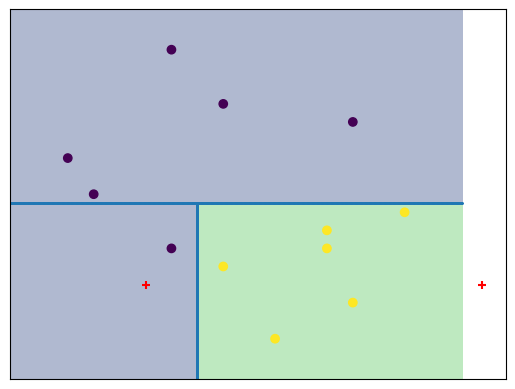

In [47]:
ax = plot_tree_partition(X, y, model);

ax.scatter(new_X[:,0], new_X[:,1], marker="+", c="red")

In [48]:
X = fruit_dat[['Height', 'Width']].to_numpy()
y = fruit_dat['Fruit'].factorize()[0]

In [49]:
from sklearn.tree import DecisionTreeClassifier

tree_depth_1 = DecisionTreeClassifier(max_depth=1, criterion="entropy", random_state=2) 
tree_depth_1.fit(X, y)

tree_depth_1.predict(X)

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

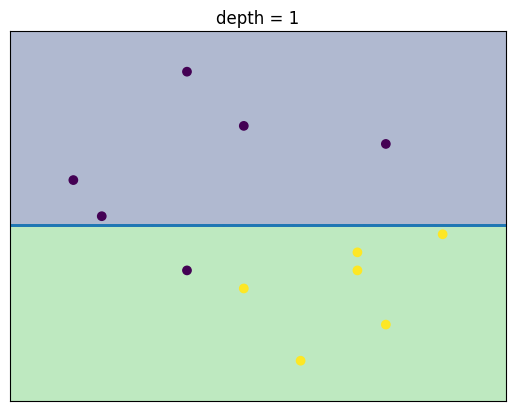

In [50]:
ax = plot_tree_partition(X, y, tree_depth_1);
ax.set_title(f"depth = {1}");

In [51]:
fruit_dat

Width  Height  Fruit
0     7.1     7.3  Apple
1     7.9     7.5  Apple
2     7.4     7.0  Apple
3     8.2     7.3  Apple
4     7.6     6.9  Apple
5     7.8     8.0  Apple
6     7.0     7.5   Pear
7     7.1     7.9   Pear
8     6.8     8.0   Pear
9     6.6     7.7   Pear
10    7.3     8.2   Pear
11    7.2     7.9   Pear

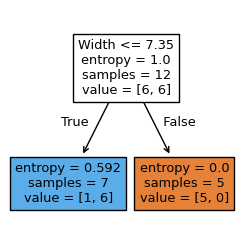

In [52]:
from sklearn.tree import plot_tree

plt.figure(figsize=(3, 3), dpi=100)

plot_tree(tree_depth_1, feature_names=['Height', 'Width'], filled=True);

决策树图中`value`为样本各分类的数量

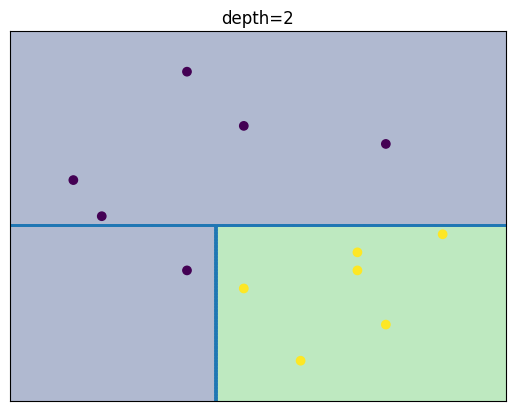

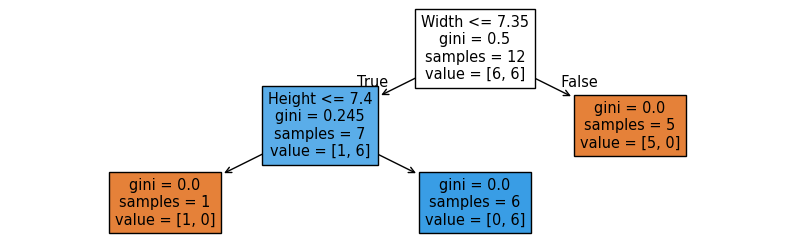

In [53]:
tree_depth_2 = DecisionTreeClassifier(max_depth=2)
tree_depth_2.fit(X, y)


plot_tree_partition(X, y, tree_depth_2)
plt.title(f"depth={tree_depth_2.max_depth}")
plt.show()


plt.figure(figsize=(10,3), dpi=100)
plot_tree(tree_depth_2, feature_names=['Height', 'Width'], filled=True)
plt.show()

## 实例：鸢尾花(iris)分类

<center ><img src="attachment:17d23f93-595f-481d-9aad-006a9bdd6c07.png" style="width:80%"></center>


Iris flowers: (a) Setosa, (b) Versicolor and (c) Virginica

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

iris = load_iris()

In [56]:
y = iris.target
df = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df['label'] = iris.target_names[iris.target]
display(df)

sepal_length  sepal_width  petal_length  petal_width      label
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

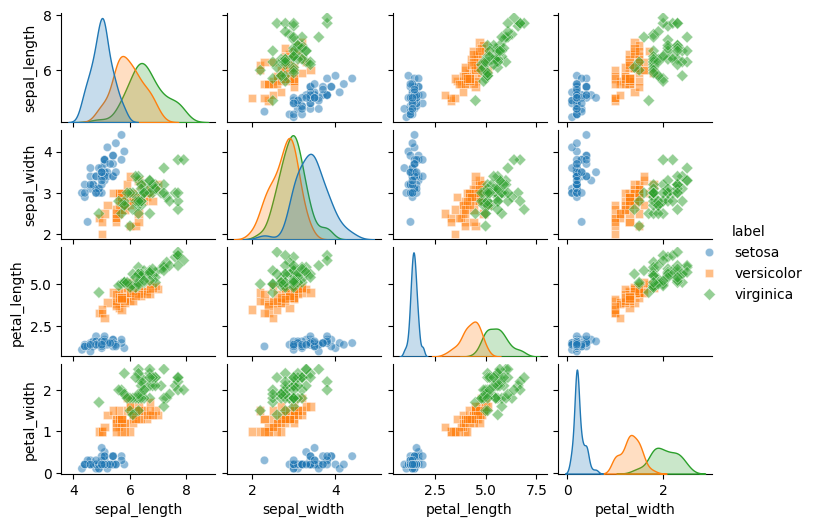

In [57]:
import seaborn as sns

g = sns.pairplot(df, hue='label', markers=["o", "s", "D"], plot_kws=dict(alpha=0.5))
g.figure.set_size_inches(8, 5)

In [60]:
X = iris.data
y = iris.target
X.shape, y.shape

((150, 4), (150,))

In [61]:
np.unique(y)

array([0, 1, 2])

In [62]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

In [63]:
(model.predict(X) == y).all()

np.True_

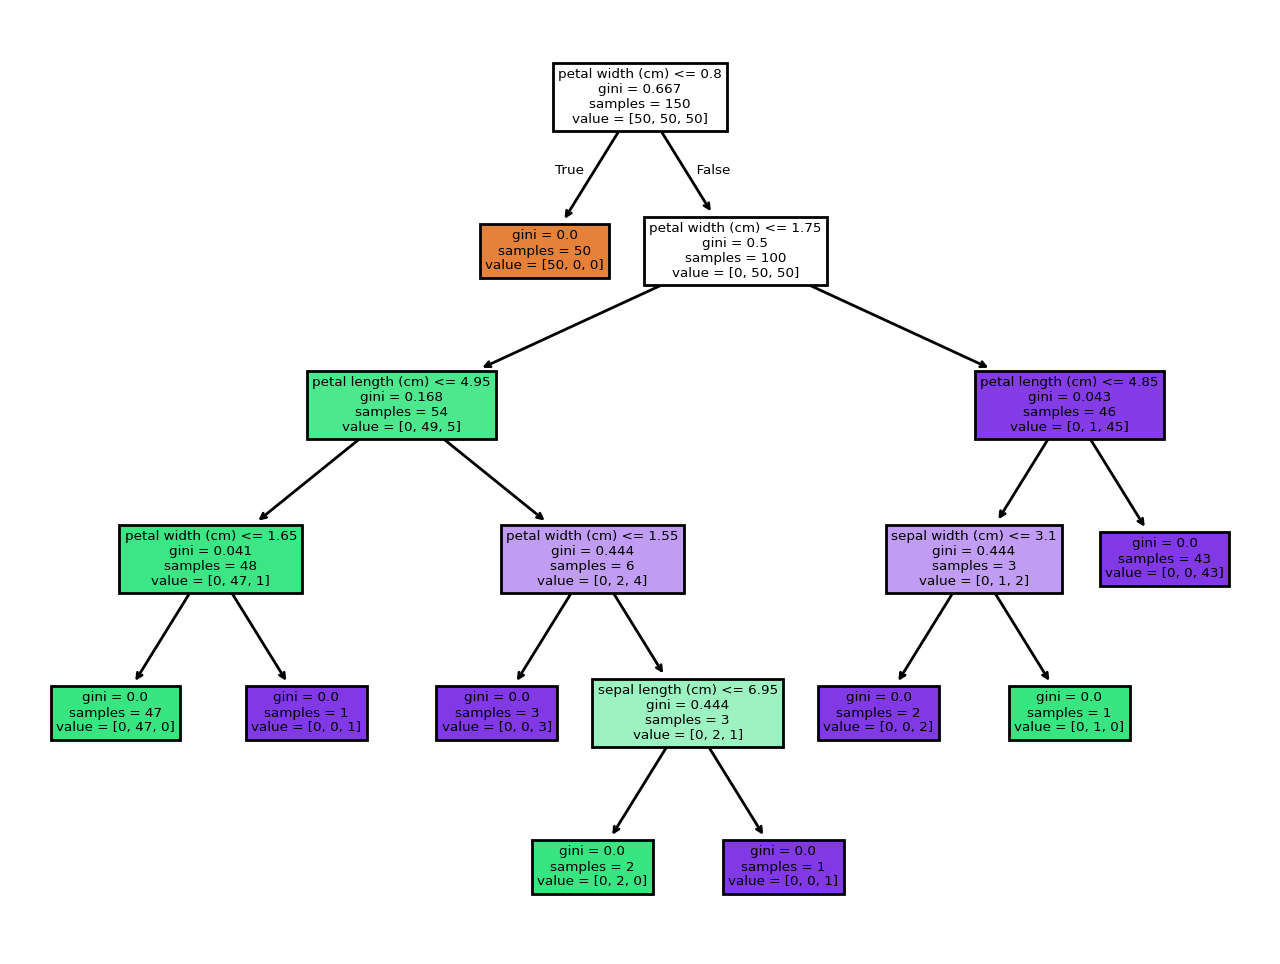

In [64]:
from sklearn.tree import plot_tree

plt.figure(figsize=(8,6), dpi=200)
plot_tree(model, feature_names=iris.feature_names, filled=True)
plt.show()

In [65]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3)
model.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [66]:
(model.predict(X) == y).sum()

np.int64(146)

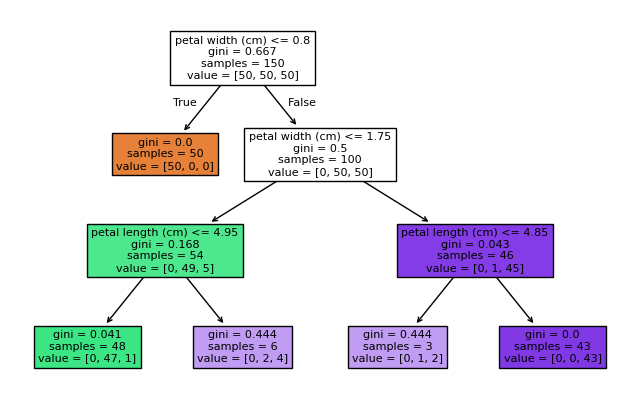

In [67]:
plt.figure(figsize=(8,5), dpi=100)
plot_tree(model, feature_names=iris.feature_names, filled=True)
plt.show()

## 实例： 癌肿瘤细胞识别


数据集包含关于细胞核的十个指标：
1. Radius（半径）, mean of distances from center to points on the perimeter
2. Texture（纹理）, standard deviation of gray-scale values
3. Perimeter（周长）
4. Area（面积）
5. Smoothness, local variation in radius lengths
6. Compactness, $perimeter^2 / area — 1.0$
7. Concavity (severity of concave portions of the contour)
8. Concave points (number of concave portions of the contour)
9. Symmetry
10. Fractal Dimension (“coastline approximation” — 1)
    > 海岸线分形维度，反映边缘的粗糙、不规则程度

这十个指标又分别应三个子指标：
* 均值, 对应数据的2列到11列
* 标准差， 数据的12到21列, 
* 最大值，数据的第22到第31列. 

数据的最后一列是标签数据，识别结果： Bening（良性肿瘤）和 Malignant（恶性肿瘤）.

<center ><IMG src="attachment:4de84300-e20a-43bd-a455-ce4b13aced98.png" style="width:40em"></center>

> As mentioned in UCI website, “Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image”. Moreover, FNA is a type of biopsy procedure where a very thin needle is inserted into an area of abnormal tissue or cells with a guide of CT scan or ultrasound monitors (figure1). The collected sample is then transferred to a pathologist to study it under a microscope and examine whether cells in the biopsy are normal or not.
> A magnified image of a malignant breast FNA. A curve-fitting algorithm was used to outline the cell nuclei. (Figure from Mangasarian OL., Street WN., Wolberg. WH. Breast Cancer Diagnosis and Prognosis via Linear Programming. Mathematical Programming Technical Report 94–10. 1994 Dec)

In [68]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()

In [69]:
type(cancer_data)

sklearn.utils._bunch.Bunch

In [70]:
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [71]:
cancer_data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [72]:
cancer_data.data.shape

(569, 30)

In [73]:
cancer_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [74]:
cancer_data.target.shape

(569,)

In [75]:
cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

target 要么是$0$要么$1$

In [76]:
cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

sklearn里得breast_cancer数据target是0或1的二分类数据，对应得cancer_data.target_names是`['malignant', 'benign']`, 为了获得较好得pandas显示效果，在target基础上，重新生成Diagnosis字段作为target

In [77]:
"""
将数据转换成Pandas得DataFrame
"""

diagnosis = np.apply_along_axis(lambda x : cancer_data.target_names[x], 0, cancer_data.target)

cancer_df = pd.concat([pd.DataFrame(diagnosis, columns=["Diagnosis"]),
                       pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)], axis=1)
cancer_df

Diagnosis  mean radius  mean texture  mean perimeter  mean area  \
0    malignant        17.99         10.38          122.80     1001.0   
1    malignant        20.57         17.77          132.90     1326.0   
2    malignant        19.69         21.25          130.00     1203.0   
3    malignant        11.42         20.38           77.58      386.1   
4    malignant        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564  malignant        21.56         22.39          142.00     1479.0   
565  malignant        20.13         28.25          131.20     1261.0   
566  malignant        16.60         28.08          108.30      858.1   
567  malignant        20.60         29.33          140.10     1265.0   
568     benign         7.76         24.54           47.92      181.0   

     mean smoothness  mean compactness  mean concavity  mean concave points  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     mean symmetry  ...  worst radius  worst texture  worst perimeter  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     worst area  worst smoothness  worst compactness  worst concavity  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

In [78]:
cancer_df["Diagnosis"].value_counts()

Diagnosis
benign       357
malignant    212
Name: count, dtype: int64

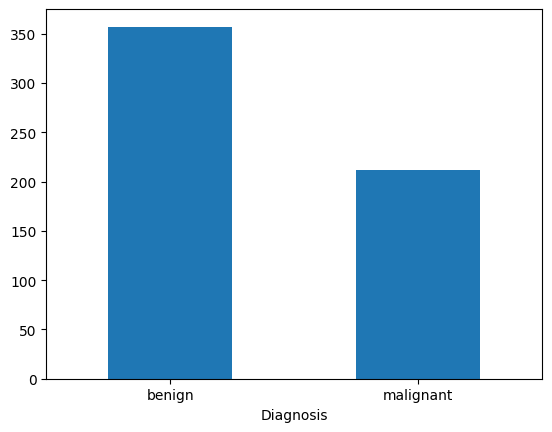

In [79]:
#plt.figure(figsize=())
ax = cancer_df.Diagnosis.value_counts().plot(kind="bar");
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='center');

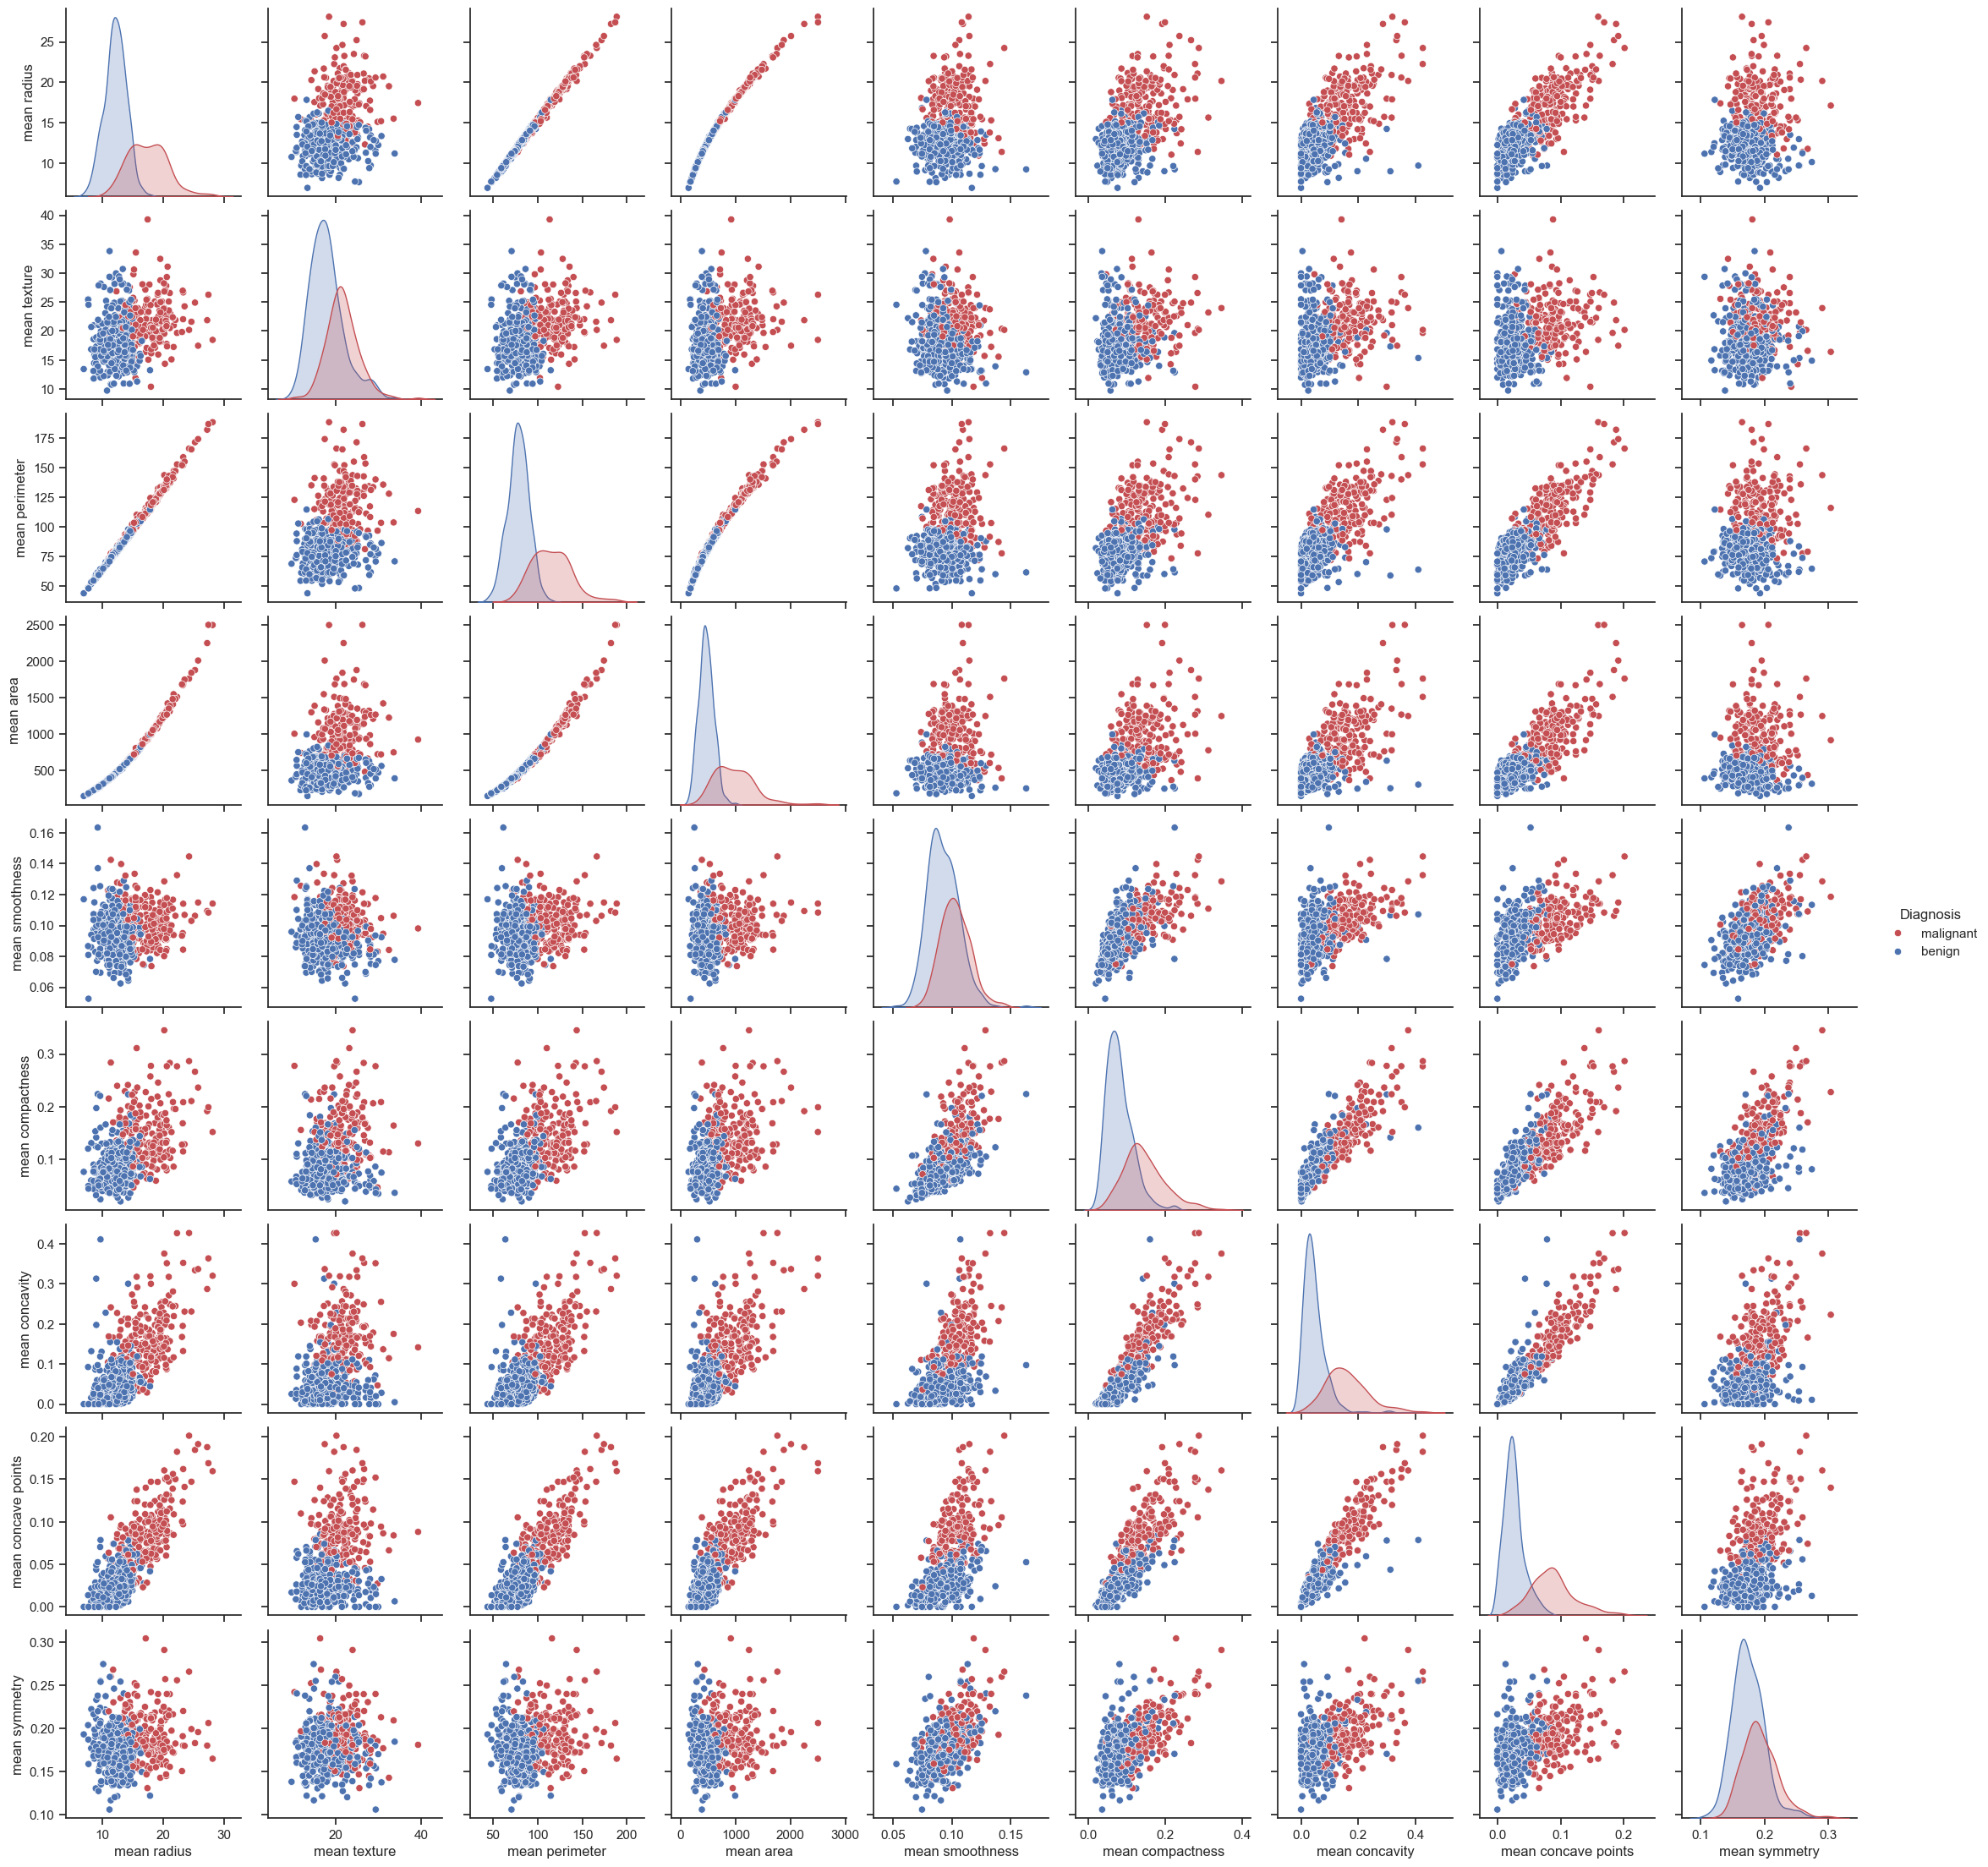

In [81]:
import seaborn as sns

sns.set_theme(style="ticks", color_codes=True)
g = sns.pairplot(cancer_df.iloc[:,0:10], palette = ('r', 'b'), hue="Diagnosis")

In [83]:
cancer_df.corr(numeric_only=True).head()

mean radius  mean texture  mean perimeter  mean area  \
mean radius         1.000000      0.323782        0.997855   0.987357   
mean texture        0.323782      1.000000        0.329533   0.321086   
mean perimeter      0.997855      0.329533        1.000000   0.986507   
mean area           0.987357      0.321086        0.986507   1.000000   
mean smoothness     0.170581     -0.023389        0.207278   0.177028   

                 mean smoothness  mean compactness  mean concavity  \
mean radius             0.170581          0.506124        0.676764   
mean texture           -0.023389          0.236702        0.302418   
mean perimeter          0.207278          0.556936        0.716136   
mean area               0.177028          0.498502        0.685983   
mean smoothness         1.000000          0.659123        0.521984   

                 mean concave points  mean symmetry  mean fractal dimension  \
mean radius                 0.822529       0.147741               -0.311631   
mean texture                0.293464       0.071401               -0.076437   
mean perimeter              0.850977       0.183027               -0.261477   
mean area                   0.823269       0.151293               -0.283110   
mean smoothness             0.553695       0.557775                0.584792   

                 ...  worst radius  worst texture  worst perimeter  \
mean radius      ...      0.969539       0.297008         0.965137   
mean texture     ...      0.352573       0.912045         0.358040   
mean perimeter   ...      0.969476       0.303038         0.970387   
mean area        ...      0.962746       0.287489         0.959120   
mean smoothness  ...      0.213120       0.036072         0.238853   

                 worst area  worst smoothness  worst compactness  \
mean radius        0.941082          0.119616           0.413463   
mean texture       0.343546          0.077503           0.277830   
mean perimeter     0.941550          0.150549           0.455774   
mean area          0.959213          0.123523           0.390410   
mean smoothness    0.206718          0.805324           0.472468   

                 worst concavity  worst concave points  worst symmetry  \
mean radius             0.526911              0.744214        0.163953   
mean texture            0.301025              0.295316        0.105008   
mean perimeter          0.563879              0.771241        0.189115   
mean area               0.512606              0.722017        0.143570   
mean smoothness         0.434926              0.503053        0.394309   

                 worst fractal dimension  
mean radius                     0.007066  
mean texture                    0.119205  
mean perimeter                  0.051019  
mean area                       0.003738  
mean smoothness                 0.499316  

[5 rows x 30 columns]

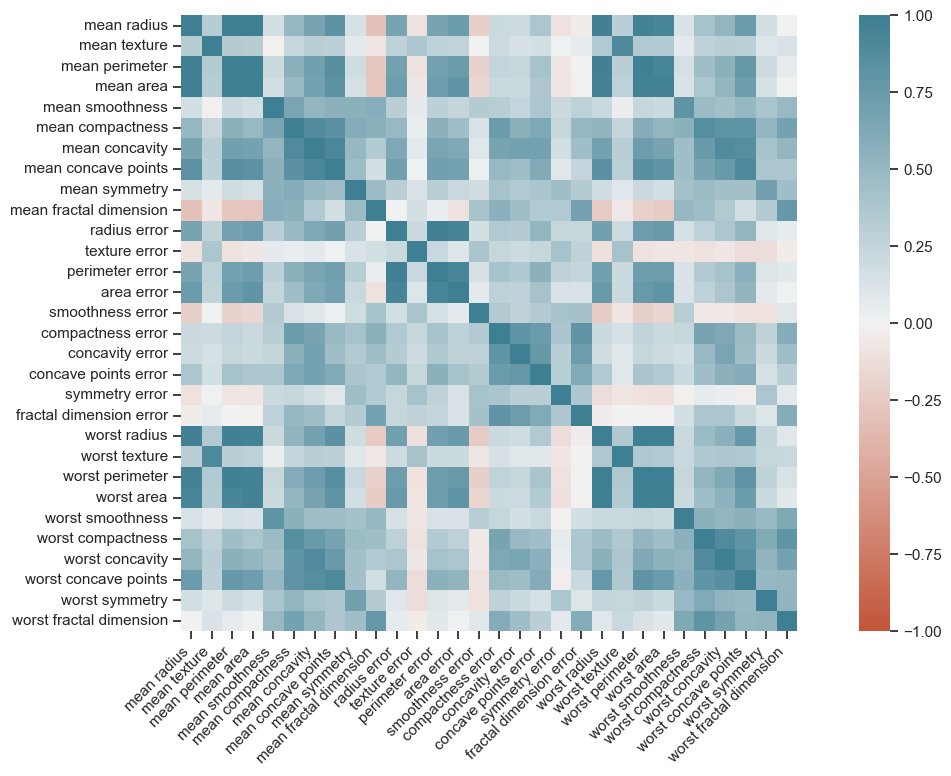

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,8))
ax = sns.heatmap(
    cancer_df.corr(numeric_only=True), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [86]:
from sklearn.model_selection import train_test_split

X = cancer_data.data
y = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=cancer_data.target, 
                                                    test_size=0.25, random_state=1)


print(f"X's shape: {X.shape}, y's shape: {y.shape}")
print(f"X_train's shape: {X_train.shape}, y_train's shape: {y_train.shape}")

X's shape: (569, 30), y's shape: (569,)
X_train's shape: (426, 30), y_train's shape: (426,)


In [87]:
X_test.shape, y_test.shape

((143, 30), (143,))

In [88]:
from sklearn.tree import DecisionTreeClassifier

cancer_tree = DecisionTreeClassifier(max_depth=3, random_state=0)
cancer_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [90]:
(cancer_tree.predict(X_train) == y_train).sum() / y_train.shape[0]

np.float64(0.971830985915493)

In [90]:
cancer_tree.predict(X_test) == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [91]:
(cancer_tree.predict(X_test) == y_test).sum() / y_test.shape[0]

np.float64(0.9440559440559441)

In [92]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, cancer_tree.predict(X_train)) 

0.971830985915493

In [93]:
accuracy_score(y_test, cancer_tree.predict(X_test)) 

0.9440559440559441

In [95]:
from sklearn.metrics import accuracy_score

pred_train = cancer_tree.predict(X_train)
pred_test = cancer_tree.predict(X_test)

print(f'Accuracy on training set: { accuracy_score(y_train, pred_train) :0.3f}')
print(f'Accuracy on test set: { accuracy_score(y_test, pred_test) :0.3f}')

Accuracy on training set: 0.972
Accuracy on test set: 0.944


Accuracy on training set: 1.000
Accuracy on test set: 0.937


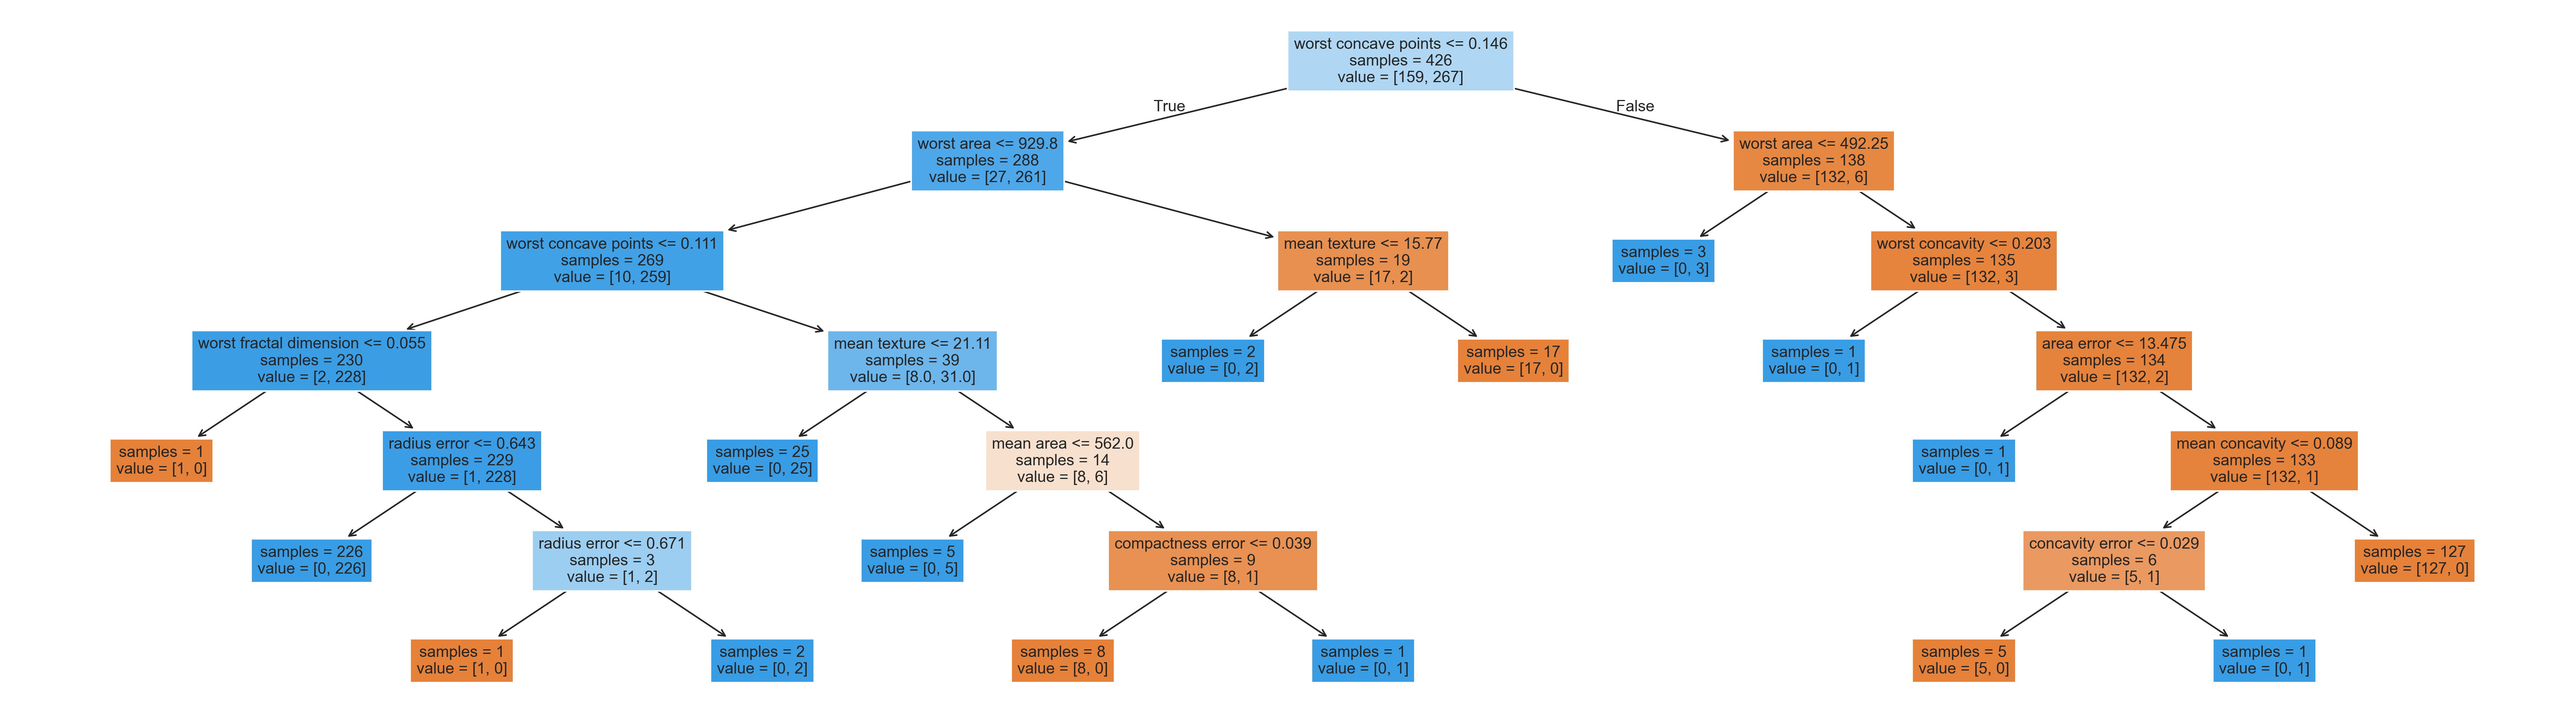

In [ ]:
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

cancer_tree = DecisionTreeClassifier(random_state=2)
cancer_tree.fit(X_train, y_train)

pred_train = cancer_tree.predict(X_train)
pred_test = cancer_tree.predict(X_test)

print(f'Accuracy on training set: { accuracy_score(y_train, pred_train) :0.3f}')
print(f'Accuracy on test set: { accuracy_score(y_test, pred_test) :0.3f}')

plt.figure(figsize=(29, 8), dpi=300)
plot_tree(cancer_tree, feature_names=cancer_data.feature_names, impurity=False, filled=True, fontsize=10)
plt.show()

Accuracy on training set: 0.972
Accuracy on test set: 0.944


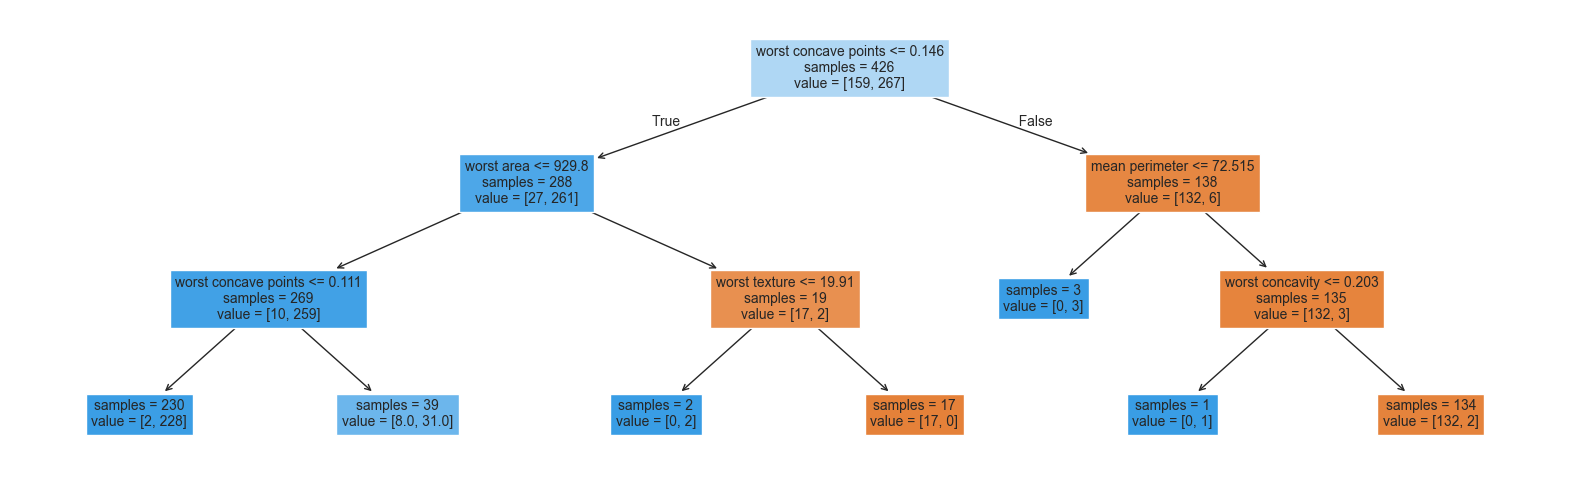

In [98]:
cancer_tree_d4 = DecisionTreeClassifier(max_depth=3)
cancer_tree_d4.fit(X_train, y_train)

print(f'Accuracy on training set: { accuracy_score(y_train, cancer_tree_d4.predict(X_train)) :0.3f}')
print(f'Accuracy on test set: { accuracy_score(y_test, cancer_tree_d4.predict(X_test)) :0.3f}')

plt.figure(figsize=(20, 6), dpi=100)
plot_tree(cancer_tree_d4, feature_names=cancer_data.feature_names, impurity=False, filled=True, fontsize=10)
plt.show()

Accuracy on training set: 1.000
Accuracy on test set: 0.930


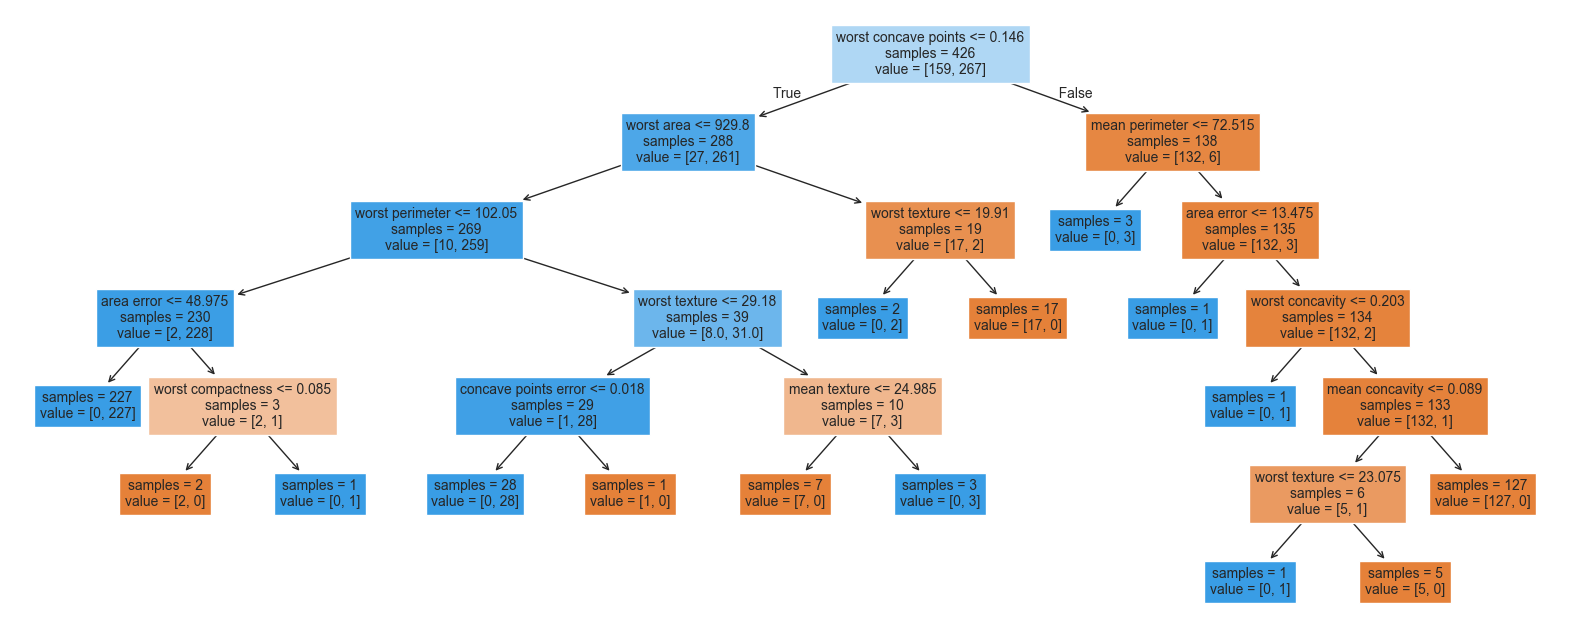

In [99]:
cancer_tree3 = DecisionTreeClassifier(min_samples_split=3, random_state=1)
cancer_tree3.fit(X_train, y_train)

print(f'Accuracy on training set: { accuracy_score(y_train, cancer_tree3.predict(X_train)) :0.3f}')
print(f'Accuracy on test set: { accuracy_score(y_test, cancer_tree3.predict(X_test)) :0.3f}')

plt.figure(figsize=(20, 8), dpi=100)
plot_tree(cancer_tree3, feature_names=cancer_data.feature_names, impurity=False, filled=True, fontsize=10)
plt.show()

## 特征重要性

`DecisionTreeClassifier`的属性`feature_importances_`是模型各特征的重要性，表示某个特征参与分类的贡献程度。

$$
\mathrm{Gain}_j = \mathrm{Impurity}_j - 
\left(
\frac{n_{\operatorname{L}(j)}} {n_j} \mathrm{Impurity}_{\operatorname{L}(j)} + 
\frac{n_{\operatorname{L}(j)}} {n_j} \mathrm{Impurity}_{\operatorname{R}(j)}
\right)
$$

$$
\mathrm{FeatureImportance}_i = 
\frac{\sum_{j \,\in\, \text{FeatureNodes}(i) } n_j \mathrm{Gain}_j }{ \sum_k n_k \mathrm{Gain}_k  }
$$


其中 $n_j$为决策树的第$j$结点的样本数量，
下标符号$\operatorname{L}(j)$代表节点$j$的左子节点下标，
$\operatorname{R}(j)$代表节点$j$的右子节点下标。


一般为了对比方面，将上面的归一化，各特征重要性之和为1：

$$
\operatorname{norm}\mathrm{FeatureImportance}_i = 
\frac{ \mathrm{FeatureImportance}_i }{ \sum_i  \mathrm{FeatureImportance}_i  }
$$



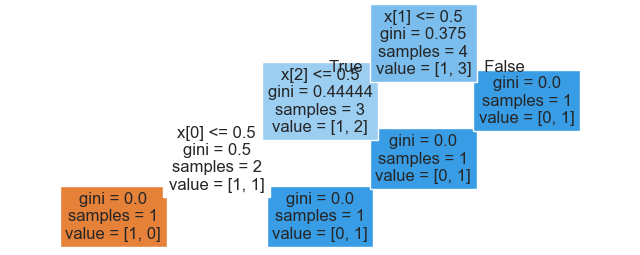

Feature Importances:  [0.66666667 0.11111111 0.22222222]


In [111]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

X = [[1,0,0], [0,0,0], [0,0,1], [0,1,0]]
y = [1,0,1,1]

model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

plt.figure(figsize=(8,3), dpi=100)
plot_tree(model, filled=True, fontsize=12, precision=5)
plt.show()

print("Feature Importances: ", model.feature_importances_)

```
```

手算`feature_importance_`

In [101]:
# 手算特征重要性
Gain_1 = 0.375 - (3/4*0.44444 + 1/4*0)
Gain_2 = 0.44444 - (2/3*0.5 + 1/3*0)
Gain_0 = 0.5 - (1/2*0 + 1/2*0)

total_NI = 2*Gain_0 + 4*Gain_1 + 3*Gain_2

FI_0 = 2*Gain_0 / total_NI
FI_1 = 4*Gain_1 / total_NI
FI_2 = 3*Gain_2 / total_NI

print(FI_0, FI_1, FI_2)

0.6666666666666666 0.11111999999999995 0.22221333333333337


```
```

决策树模型计算得到的特征重要程度，依据的训练所得到的决策树，在决策树生成时，采取了随机的方法，因此，算法生成的决策树也是随机的。

In [102]:
for i in range(5):
    model = DecisionTreeClassifier(random_state=i).fit(X, y)
    print("Feature Importances: ", model.feature_importances_)

Feature Importances:  [0.66666667 0.11111111 0.22222222]
Feature Importances:  [0.11111111 0.66666667 0.22222222]
Feature Importances:  [0.11111111 0.22222222 0.66666667]
Feature Importances:  [0.22222222 0.66666667 0.11111111]
Feature Importances:  [0.66666667 0.22222222 0.11111111]


In [104]:
trails = np.array([
    DecisionTreeClassifier().fit(X, y).feature_importances_
    for i in range(100)
])

print(trails.shape)

print("mean of feature importance:", trails.mean(axis=0).round(4))

(100, 3)
mean of feature importance: [0.3956 0.3044 0.3   ]


```
```

### 肿瘤识别的特征分析

In [114]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

In [126]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

Feature importances: 
[0.         0.04248468 0.         0.00563858 0.         0.
 0.00877112 0.         0.         0.         0.007316   0.
 0.         0.00204521 0.00100384 0.03184137 0.         0.00563858
 0.00583135 0.         0.69559352 0.0460766  0.         0.0110859
 0.01440488 0.         0.0082799  0.11398847 0.         0.        ]
0.9999999999999999


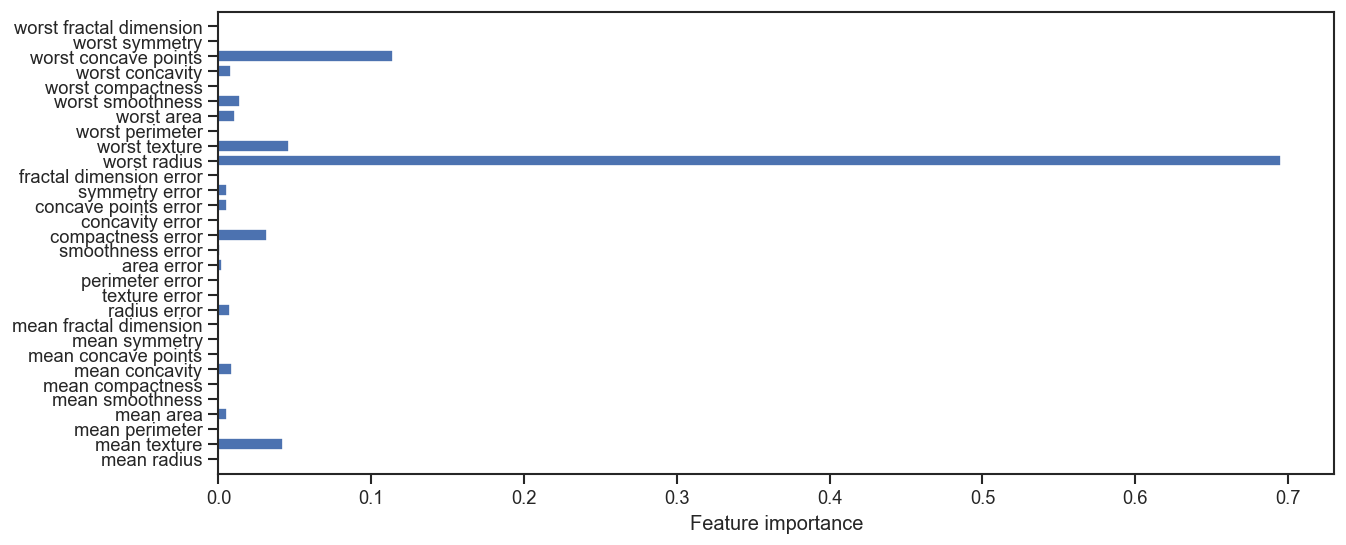

In [116]:
from sklearn.tree import DecisionTreeClassifier

n_features = X.shape[1]

cancer_tree = DecisionTreeClassifier()
cancer_tree.fit(X, y)

print("Feature importances: ")
print(cancer_tree.feature_importances_)
print(cancer_tree.feature_importances_.sum())

feat_range = np.arange(X.shape[1])

plt.figure(figsize=(12, 5), dpi=120)
plt.barh(feat_range, cancer_tree.feature_importances_, align='center')
plt.yticks(feat_range, cancer_data.feature_names)
plt.xlabel("Feature importance")
plt.ylim(-1, n_features);

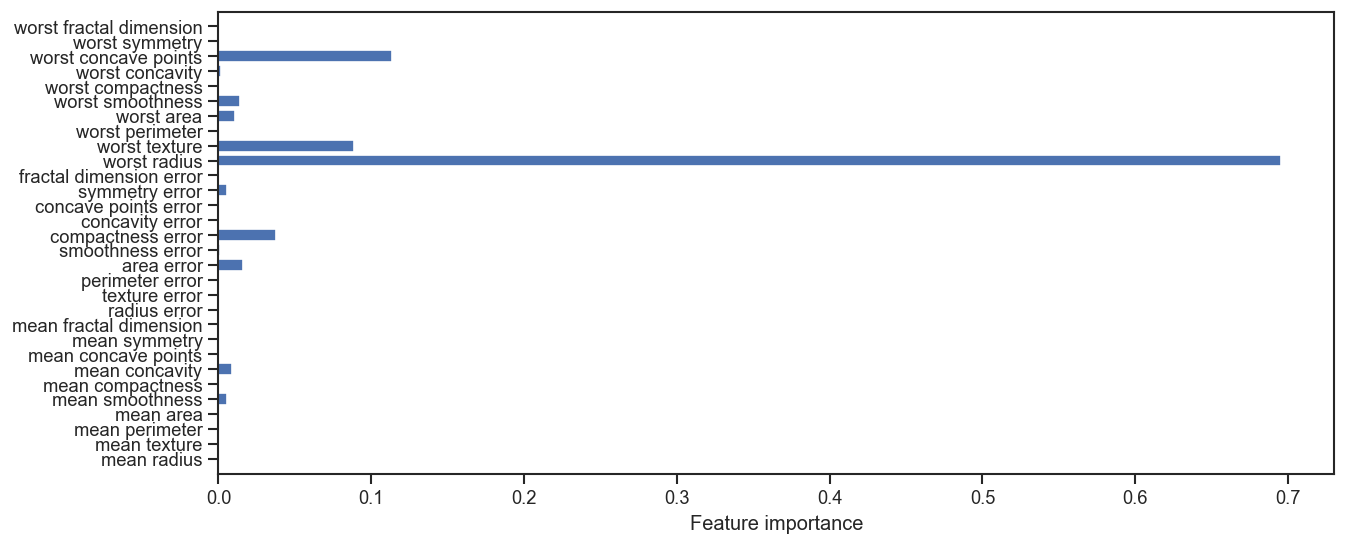

In [119]:
cancer_tree = DecisionTreeClassifier()
cancer_tree.fit(X, y)

feat_range = np.arange(X.shape[1])
plt.figure(figsize=(12, 5), dpi=120)
plt.barh(feat_range, cancer_tree.feature_importances_, align='center')
plt.yticks(feat_range, cancer_data.feature_names)
plt.xlabel("Feature importance")
plt.ylim(-1, n_features);

In [120]:
model = DecisionTreeClassifier(max_depth=4)
trails = np.array([
    model.fit(X, y).feature_importances_
    for i in range(500)
])

In [121]:
trails.shape

(500, 30)

In [122]:
trails.mean(axis=0)

array([0.        , 0.01741174, 0.        , 0.        , 0.        ,
       0.        , 0.00472624, 0.01227797, 0.        , 0.        ,
       0.00128819, 0.        , 0.00133475, 0.00342653, 0.        ,
       0.00938931, 0.00756549, 0.        , 0.00139683, 0.        ,
       0.73782365, 0.05661541, 0.        , 0.01175894, 0.00783651,
       0.        , 0.00194727, 0.12271794, 0.00121058, 0.00127267])

In [123]:
trails.std(axis=0)

array([0.00000000e+00, 1.65286908e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.65121516e-03, 1.48677705e-02,
       0.00000000e+00, 0.00000000e+00, 2.88740479e-03, 0.00000000e+00,
       2.92853214e-03, 2.85923676e-03, 0.00000000e+00, 1.51314241e-02,
       1.40813300e-02, 0.00000000e+00, 2.98135561e-03, 0.00000000e+00,
       3.28649644e-15, 1.65286908e-02, 0.00000000e+00, 5.53058574e-17,
       7.13340568e-17, 0.00000000e+00, 1.29232642e-17, 1.49945045e-02,
       2.81581505e-03, 2.87339721e-03])

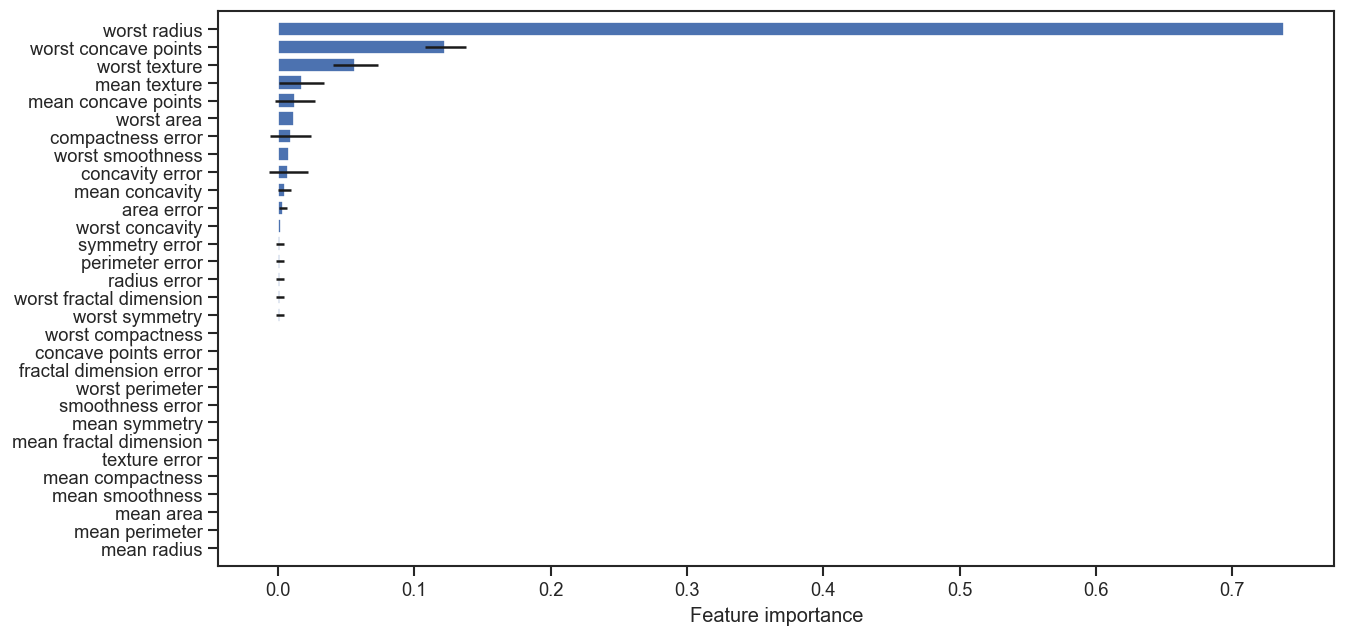

In [128]:
fi_values = trails.mean(axis=0)
fi_errors = trails.std(axis=0)

ord_idxs = np.argsort(fi_values)

feat_range = np.arange(cancer_data.data.shape[1])
plt.figure(figsize=(12, 6), dpi=120)
plt.barh(feat_range, fi_values[ord_idxs] , xerr=fi_errors[ord_idxs])
plt.yticks(feat_range, cancer_data.feature_names[ord_idxs])
plt.xlabel("Feature importance")
plt.ylim(-1, n_features);

In [131]:
fi_values

array([0.        , 0.01741174, 0.        , 0.        , 0.        ,
       0.        , 0.00472624, 0.01227797, 0.        , 0.        ,
       0.00128819, 0.        , 0.00133475, 0.00342653, 0.        ,
       0.00938931, 0.00756549, 0.        , 0.00139683, 0.        ,
       0.73782365, 0.05661541, 0.        , 0.01175894, 0.00783651,
       0.        , 0.00194727, 0.12271794, 0.00121058, 0.00127267])

In [133]:
np.argsort(fi_values)

array([ 0,  2,  3,  4,  5, 11,  9,  8, 14, 22, 19, 17, 25, 28, 29, 10, 12,
       18, 26, 13,  6, 16, 24, 15, 23,  7,  1, 21, 27, 20])

In [130]:
fi_values[np.argsort(fi_values)]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00121058, 0.00127267,
       0.00128819, 0.00133475, 0.00139683, 0.00194727, 0.00342653,
       0.00472624, 0.00756549, 0.00783651, 0.00938931, 0.01175894,
       0.01227797, 0.01741174, 0.05661541, 0.12271794, 0.73782365])

In [132]:
fi_errors[np.argsort(fi_values)]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.81581505e-03, 2.87339721e-03, 2.88740479e-03,
       2.92853214e-03, 2.98135561e-03, 1.29232642e-17, 2.85923676e-03,
       4.65121516e-03, 1.40813300e-02, 7.13340568e-17, 1.51314241e-02,
       5.53058574e-17, 1.48677705e-02, 1.65286908e-02, 1.65286908e-02,
       1.49945045e-02, 3.28649644e-15])